# Programming Assingment 4: Classification 

In this assignment you will train a binary classifier for predicting whether a patient's breast tumor is malignant or  benign. You will be provided a data set with tumor traits. This data set is available in scikit-learn.

Your task is to train and build a classifier  by following the steps below.

Implement all tasks in your notebook and submit your notebook ipynb file. 

## Task 1  (25 points)

**Task 1A**: Build a decision tree classifier by creating a single random training and testing dataset. Your training set should be 80% of your original sample set. Visualize your decision tree and report its accuracy on your testing dataset. (5 points)

The prediction accuracy is:  89.47368421052632 %


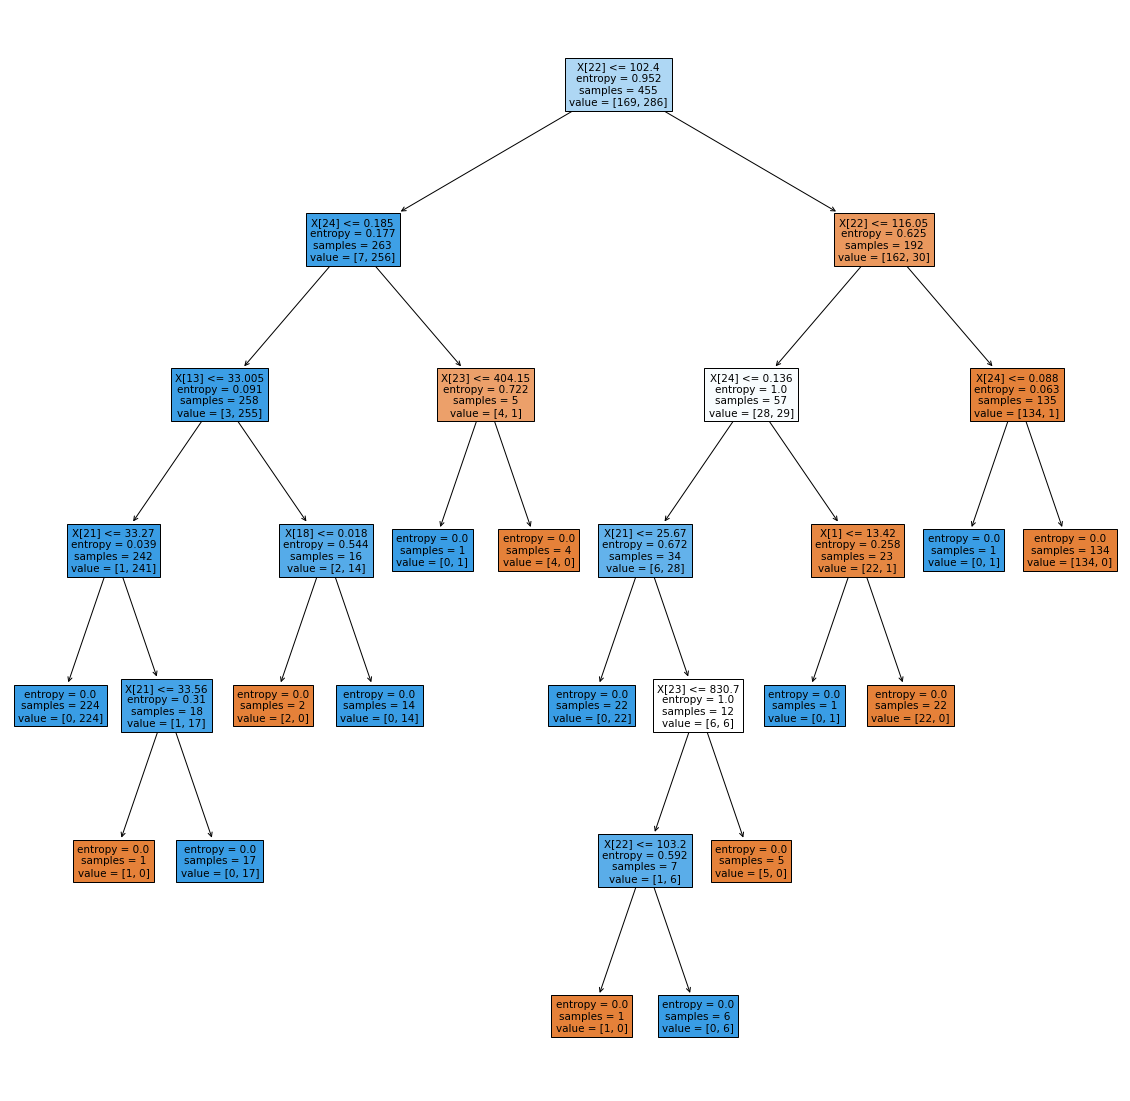

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data = load_breast_cancer()


train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size = 0.2)


dt = DecisionTreeClassifier(criterion = 'entropy').fit(train_x,train_y)

print("The prediction accuracy is: ",dt.score(test_x,test_y)*100,"%")

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt, filled=True)




**Task 1.B:** Evaluate the performance of your classsifer over 10 random training/test sets (of equal size) and report all accuracy values you collected as well as the average accuracy. (15 points)


In [23]:
import numpy as np

np.random.seed(0)

accs = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size = 0.2)
    
    dt = DecisionTreeClassifier(criterion = 'entropy').fit(train_x,train_y)
    accuracy = dt.score(test_x,test_y)*100
    accs.append(accuracy)
    
print(accs)
avg_acc = np.average(accs)

print("The average prediction accuracy is: ",avg_acc,"%")


[93.85964912280701, 95.6140350877193, 93.85964912280701, 92.10526315789474, 96.49122807017544, 98.24561403508771, 92.98245614035088, 93.85964912280701, 92.10526315789474, 93.85964912280701]
The average prediction accuracy is:  94.2982456140351 %


**Task 1.C:** Compare the accuracy your observed with each of the two approaches (are they similar/different, how accuracy flunctuates, etc). (5points)

In [24]:
'''
The accuracy for the first approach, using 80% of the data set, is quite high at 93.85%, although it appears
to fluctuate +/- 1.5% each time it is run. 

The accuracy for the second approach, using 10 random training/test sets (still of 80%) is marginally better
at 94.30%. As shown by the list of accuracy values, the accuracy does fluctuate from 92.11%-98.25%. That
being said, the second method allows you to establish error on the accuracy, allowing more confidence that
the model will perform similarly when trained on different data sets
'''

'\nThe accuracy for the first approach, using 80% of the data set, is quite high at 93.85%, although it appears\nto fluctuate +/- 1.5% each time it is run. \n\nThe accuracy for the second approach, using 10 random training/test sets (still of 80%) is marginally better\nat 94.30%. As shown by the list of accuracy values, the accuracy does fluctuate from 92.11%-98.25%. That\nbeing said, the second method allows you to establish error on the accuracy, allowing more confidence that\nthe model will perform similarly when trained on different data sets\n'

## Task 2 (25 points) 

**Task 2.A:** Perform 10-fold cross validation to explore how the max_depth and the min_samples parameter of your classifer affect its accuracy.  You are NOT allowed to use the grid search function for this task. You should try tree depths values ranging from 1 to 20 and min samples at leaf that range from 1 to 10. (10points, 5 for each parameter)


In [25]:
from sklearn.model_selection import cross_val_score

train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size = 0.2)

depth = []
for i in range(1,20):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    scores = cross_val_score(estimator = dt, X =train_x, y = train_y, cv = 10)
    depth.append(np.average(scores))
    
min_samples = []
for i in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = i)
    scores = cross_val_score(estimator = dt, X = train_x, y = train_y, cv = 10)
    min_samples.append( np.average(scores))
print(depth)
print(min_samples)

[0.892512077294686, 0.9143478260869566, 0.909951690821256, 0.9253623188405797, 0.9319323671497586, 0.918695652173913, 0.9274879227053141, 0.9120289855072464, 0.9275845410628019, 0.9209661835748791, 0.9188405797101449, 0.9231884057971016, 0.9231884057971016, 0.9253140096618357, 0.9341545893719807, 0.9254589371980677, 0.9209178743961353, 0.9231884057971016, 0.9341062801932367]
[0.9253140096618357, 0.9209178743961353, 0.9121739130434783, 0.9121739130434783, 0.9122222222222222, 0.9253140096618357, 0.927536231884058, 0.9232367149758455, 0.9232367149758455]


## Task 2 (25 points) 

**Task 2.B:** Plot 2 boxplot graphs  that show how each of these parameters affect the accuracy. (5 points each plot)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e7c7b664f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7c7b66bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e7c7b66190>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7c7b6e2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7c7b6e640>],
 'means': []}

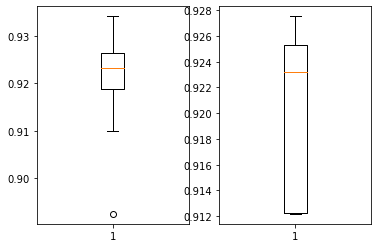

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.boxplot(depth)
ax2.boxplot(min_samples)


**Task 2.C:** Use the training and testing set we provided to test the classifier with the best max_depth and min_samples_leaf parameters you discovered as well as classifier that use the default parameters for a decision tree. Which one is performing better in terms of accuracy? (5points)

In [46]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]
test_x = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 4).fit(train_x, train_y)

accuracy = dt.score(test_x, test_y)

print("The prediction accuracy is: ",accuracy*100,"%")

'''
The model performs better (96.49% vs 93.86%) than the model with default parameters. However, 
this result is not stable. as these values fluctuate, but generally, the difference in their accuracies is 
within 2%, with this model almost always performing better.
'''

The prediction accuracy is:  96.49122807017544 %


'\nThe model performs marginally better (94.74% vs 93.86%) than the model with default parameters. However, \nthis result is not stable. as these values fluctuate, but generally, the difference in their accuracies is \nwithin 1.5%\n'

## Task 3 (25 points) 

Perform a nested cross validation to explore how  different classification algorithms perform on this task. You should try random tree forest and kNN.  All of them could be validated through 5-fold validation and you should use the  grid search function available in sklearn for your internal cross validation. Discuss which classifier performed better. It is up to you which parameters you use in your grid search but keep in mind that the more parameter you use the longer the execution time. To help you TAs grading this part we ask that you restrict your exploration to a singe parameter per model. 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size = 0.2)

forest = RandomForestClassifier()

forest_grid_param ={'n_estimators': [20,40,80,120,160,200]}
forest_grid = GridSearchCV(estimator = forest, param_grid = forest_grid_param, scoring = 'accuracy', cv = 5)
forest_grid.fit(train_x, train_y)

kNN = KNeighborsClassifier()

kNN_grid_param = {'n_neighbors': [2,4,6,8,10,12]}
kNN_grid = GridSearchCV(estimator = kNN, param_grid = kNN_grid_param, scoring = 'accuracy', cv = 5)
kNN_grid.fit(train_x, train_y)

print("Optimal Random Forest Parameter: " + str(forest_grid.best_params_))
print("Optimal Random Forest Accuracy: " + str(forest_grid.best_score_))

print("Optimal k-Neighbors Parameter: " + str(kNN_grid.best_params_))
print("Optimal k-Neighbors Accuracy: " + str(kNN_grid.best_score_))


'''
The Random Forest classifier with 80 estimators performed better than k-neighbors with 8 neighbors, with 
96.92% vs. 93.62% accuracy, respectively.
'''

Optimal Random Forest Parameter: {'n_estimators': 80}
Optimal Random Forest Accuracy: 0.9692307692307693
Optimal k-Neighbors Parameter: {'n_neighbors': 8}
Optimal k-Neighbors Accuracy: 0.9362637362637363


'\n\n'

## Task 4 (25 points)

Once you identify your best classifier, train it on the training set we provided and report the confusion matric, the recall and precision of it on the test set we provided.  You should also report  the F1-score.  The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision *p* and recall *r*. The F1 score is given by:

$F1 = 2\frac{p \cdot r}{p+r}\ \ \mathrm{where}\ \ p = \frac{tp}{tp+fp},\ \ r = \frac{tp}{tp+fn}$

The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


forest = RandomForestClassifier(n_estimators = 80)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]
test_x = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]

forest.fit(train_x, train_y)

y_pred = forest.predict(test_x)

print("Confusion matrix: \n" + str(metrics.confusion_matrix(y_pred,test_y)))

recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)

f1 = (2*(recall * precision/(recall + precision)))

print("Recall = " + str(recall))
print("Precision = " + str(precision))
print("F1 Score = " + str(f1))

Confusion matrix: 
[[40  1]
 [ 3 70]]
Recall = 0.9859154929577465
Precision = 0.958904109589041
F1 Score = 0.9722222222222222
